In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("drug200.csv")

In [2]:
data

Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]

# Data Cleaning

In [3]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data["Drug"].replace({"DrugY": "Y", "drugX": "X","drugA":"A","drugC":"C","drugB":"B"}, inplace=True)

# EDA

In [6]:
def count_values(dataframe):
    categorical=dataframe.columns.values.tolist()
    for col in categorical:
        print(f"Value Counts in {col} is: \n {dataframe[col].value_counts()}")
        print("\n")
count_values(data)

Value Counts in Age is: 
 47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64


Value Counts in Sex is: 
 M    104
F     96
Name: Sex, dtype: int64


Value Counts in BP is: 
 HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


Value Counts in Cholesterol is: 
 HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


Value Counts in Na_to_K is: 
 12.006    2
18.295    2
25.355    1
11.939    1
16.347    1
         ..
24.658    1
24.276    1
13.967    1
19.675    1
11.349    1
Name: Na_to_K, Length: 198, dtype: int64


Value Counts in Drug is: 
 Y    

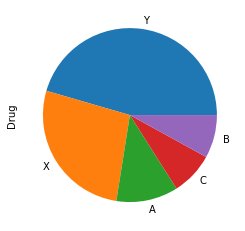

In [7]:
import matplotlib.pyplot as plt
data['Drug'].value_counts().head(5).plot.pie()

data_feyn=data
plt.gca().set_aspect('equal')

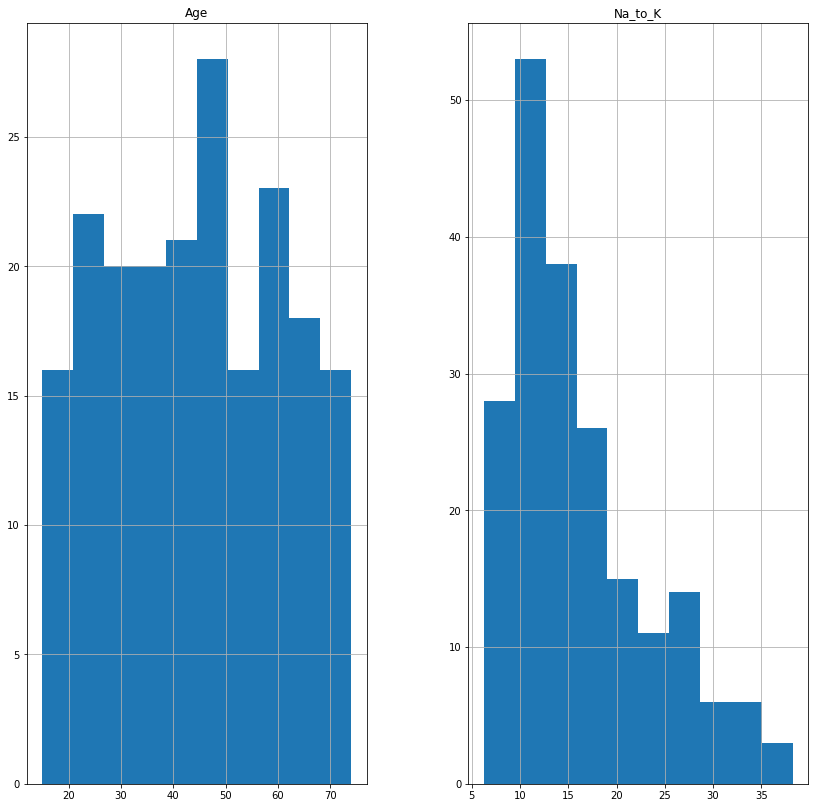

<ipython-input-8-341c627b5344>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return dataframe.var()


Age        273.714347
Na_to_K     52.185533
dtype: float64

In [8]:
def var_distribution2(dataframe):
    import matplotlib.pyplot as plt
    numbers = pd.Series(dataframe.columns)
    dataframe[numbers].hist(figsize=(14,14))
    plt.show();
    return dataframe.var()
var_distribution2(data)

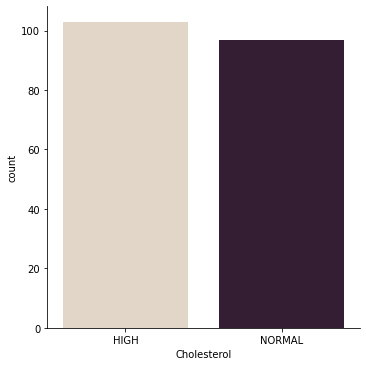

In [9]:
sns.catplot(x="Cholesterol", kind="count", palette="ch:.25", data=data)

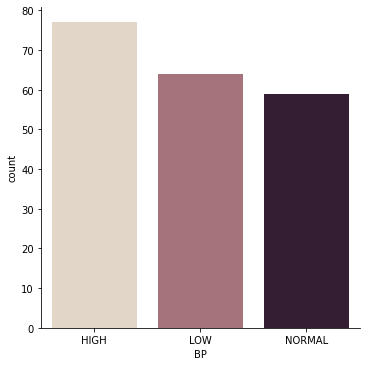

In [10]:
sns.catplot(x="BP", kind="count", palette="ch:.25", data=data)

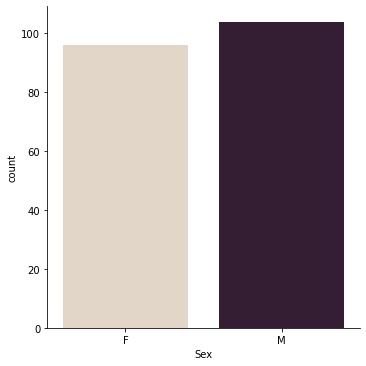

In [11]:
sns.catplot(x="Sex", kind="count", palette="ch:.25", data=data)

In [12]:
data.groupby("Drug").mean()

Age    Na_to_K
Drug                      
A     35.869565  10.918783
B     62.500000  11.524375
C     42.500000  10.633750
X     44.018519  10.650556
Y     43.747253  22.374780

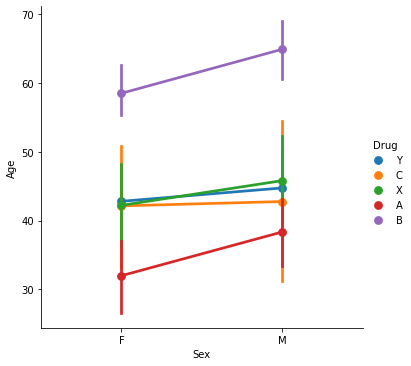

In [13]:
sns.catplot(x="Sex", y="Age", hue="Drug", kind="point", data=data)


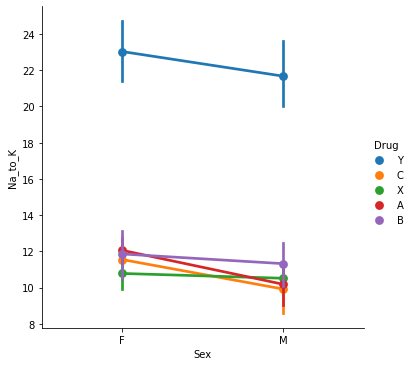

In [14]:
sns.catplot(x="Sex", y="Na_to_K", hue="Drug", kind="point", data=data)

<AxesSubplot:xlabel='Drug', ylabel='Age'>

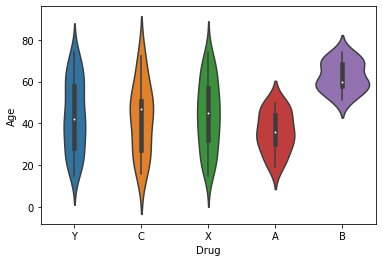

In [15]:
sns.violinplot(x=data.Drug, y=data.Age)

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

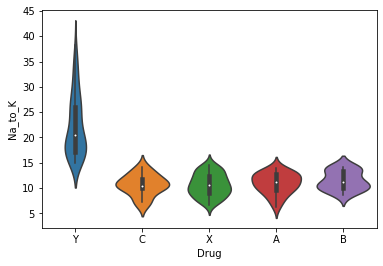

In [16]:
sns.violinplot(x=data.Drug, y=data.Na_to_K)

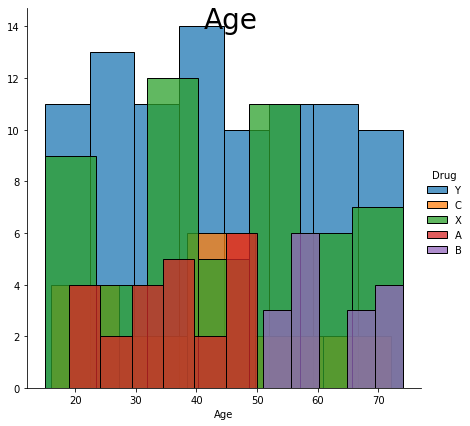

In [17]:
sns.FacetGrid(data, hue="Drug", height=6) \
   .map(sns.histplot, "Age") \
   .add_legend();
plt.suptitle("Age",size=28)
plt.show();

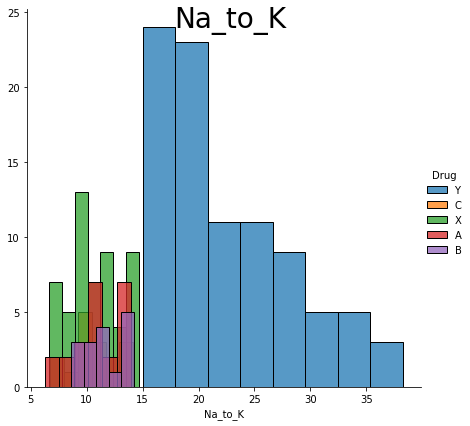

In [18]:
sns.FacetGrid(data, hue="Drug", height=6) \
   .map(sns.histplot, "Na_to_K") \
   .add_legend();
plt.suptitle("Na_to_K",size=28)
plt.show();

Age   Na_to_K       Sex        BP  Cholesterol
Age          1.000000  0.063119  0.102027  0.054212     0.068234
Na_to_K      0.063119  1.000000  0.125008  0.149312     0.010000
Sex          0.102027  0.125008  1.000000  0.007814     0.008811
BP           0.054212  0.149312  0.007814  1.000000     0.137552
Cholesterol  0.068234  0.010000  0.008811  0.137552     1.000000

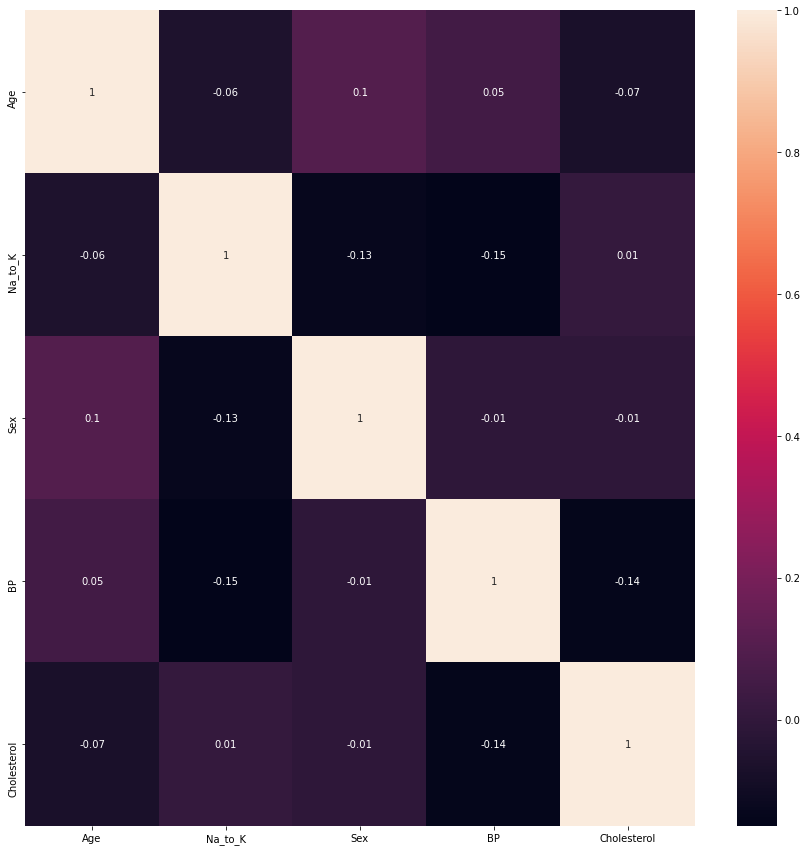

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
def corr(dataframe,target_variable):
    fig, ax = plt.subplots(figsize=(15,15))
    correlation_matrix = dataframe.corr().round(2)
    sns.heatmap(data=correlation_matrix, annot=True)
    correlation = data.corr().abs()
#     .sort_values(ascending = False)
    return correlation
corr(data,"Drug")

In [47]:
def Outliers(dataframe,cols):
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    numeric_col2=[]
    for x in cols:
        numeric_col2.append(x)

    fig=make_subplots(rows=1, cols=len(cols))

    for i,col in enumerate(numeric_col2):
        fig.add_trace(go.Box(y=dataframe[col].values, name=dataframe[col].name), row=1, col=i+1)

    return fig.show()

cols=data.columns.values.tolist()
Outliers(data,cols)

# Data Preprocessing

In [21]:
from sklearn import preprocessing
data2=data
subset=["Age","Na_to_K","Drug"]
data2=data2.drop(subset,axis=1)
data2=data2.apply(preprocessing.LabelEncoder().fit_transform)
data=data.drop(["Sex","BP","Cholesterol"],axis=1)
data=pd.concat([data,data2],axis=1)

data

Age  Na_to_K Drug  Sex  BP  Cholesterol
0     23   25.355    Y    0   0            0
1     47   13.093    C    1   1            0
2     47   10.114    C    1   1            0
3     28    7.798    X    0   2            0
4     61   18.043    Y    0   1            0
..   ...      ...  ...  ...  ..          ...
195   56   11.567    C    0   1            0
196   16   12.006    C    1   1            0
197   52    9.894    X    1   2            0
198   23   14.020    X    1   2            1
199   40   11.349    X    0   1            1

[200 rows x 6 columns]

In [22]:
def feature_selector(dataframe,feature_number,target_variable):
    from sklearn import datasets
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LogisticRegression
    
    dataframe2=dataframe[target_variable]
    dataframe=dataframe.drop([target_variable],axis=1)
     
    n=feature_number
    lr = LogisticRegression(solver="liblinear")
    rfe=RFE(lr,n)
    rfe=rfe.fit(dataframe,dataframe2)
    cols=[]
    for x in dataframe.columns.values.tolist():
        cols.append(x)
    ranking=[]
    for x in rfe.ranking_:
        ranking.append(x)
    n=0
    for x in rfe.support_:
        print(f"{ranking[n]}: {x}----> {cols[n]}")
        n+=1
    selected=[]
    n=0
    z=zip(dataframe.columns.values.tolist(),rfe.support_)
    z=list(z)
    for x in range(len(z)+1):
    
        try:
            if str(z[n][1])=="True":
                selected.append(z[n])
            else:
                pass
        except IndexError:
            pass
        n+=1
    cols_selected=[]   
    
    for x,y in selected:
        cols_selected.append(x)
    
    if len(cols_selected)==feature_number:
        return  cols_selected
    else:
        print("ERROR!. Cols_Selected does not meet feature_number requirements")

        
feature_selector(data,3,"Drug")


3: False----> Age
1: True----> Na_to_K
2: False----> Sex
1: True----> BP
1: True----> Cholesterol


/home/vijay/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


['Na_to_K', 'BP', 'Cholesterol']

In [23]:
def VIF(dataframe,chosen_cols):
    from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
    from statsmodels.tools.tools import add_constant
    X=dataframe[chosen_cols]
    X=add_constant(X)
    vif_data=pd.DataFrame()
    vif_data["feature"]=X.columns
    vif_data["VIF"]=[VIF(X.values, i) for i in range(len(X.columns))]
    return vif_data

In [26]:
chosen_cols=['Na_to_K', 'BP', 'Cholesterol']
VIF(data,chosen_cols)

/home/vijay/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


feature       VIF
0        const  9.459282
1      Na_to_K  1.022921
2           BP  1.042544
3  Cholesterol  1.019403

# Predicting

**LOGISTIC REGRESSION**

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import pandas as pd
from sklearn import metrics
import numpy as np
X=data[chosen_cols]
Y=data["Drug"]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)
lm=linear_model.LogisticRegression(max_iter=1000)
lm.fit(X_train,Y_train)
predict=lm.predict(X_test)
probs=lm.predict_proba(X_test)
prob=probs[:,1]
prob_df=pd.DataFrame(prob)
    

treshold = 0.25

    
print(f"Prediction Accuracy (Test): {metrics.accuracy_score(Y_test,predict)}")
print()
prob_df["prediction"]= np.where(prob_df[0]> treshold,1,0)
print(prob_df)
print(f"\nTreshold: {treshold}")
print()
con_tab=pd.crosstab(prob_df["prediction"],columns="Count")
print(f"Number of Positive Cases: {con_tab.values[1]/len(prob_df)*100}%")
con_tab
    

Prediction Accuracy (Test): 0.95

               0  prediction
0   5.167796e-02           0
1   2.397768e-03           0
2   5.566325e-08           0
3   1.769297e-24           0
4   7.398640e-08           0
5   5.995007e-02           0
6   1.495667e-03           0
7   6.180622e-02           0
8   8.667870e-03           0
9   3.511841e-04           0
10  4.004453e-01           1
11  1.345979e-13           0
12  4.728506e-10           0
13  3.362078e-04           0
14  3.482162e-01           1
15  8.773943e-02           0
16  3.034896e-20           0
17  1.607047e-09           0
18  6.406890e-02           0
19  1.389342e-03           0
20  7.240473e-02           0
21  1.644357e-03           0
22  3.817179e-04           0
23  6.686292e-02           0
24  5.368661e-19           0
25  2.552366e-05           0
26  2.237521e-04           0
27  1.609618e-15           0
28  9.832131e-12           0
29  5.761851e-04           0
30  5.862935e-02           0
31  8.150246e-02           0
32  3.811

col_0       Count
prediction       
0              36
1               4

**DECISION TREE**

In [49]:
def sklearn_decision_tree_clasiffier(dataframe,chosen_cols,target_variable,max_depth):
    from sklearn.tree import DecisionTreeClassifier
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    X=dataframe[chosen_cols]
    Y=dataframe[target_variable]
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)
    
    tree=DecisionTreeClassifier(criterion="entropy",min_samples_split=int((len(dataframe)/16)),max_depth=max_depth)
    tree.fit(X_train,Y_train)
    predict=tree.predict(X_test)
    predict2=tree.predict(X_train)
    print(f"Prediction Accuracy (Train): {metrics.accuracy_score(Y_train,predict2)}")
    print(f"Prediction Accuracy (Test): {metrics.accuracy_score(Y_test,predict)}")
    

In [50]:
sklearn_decision_tree_clasiffier(data,chosen_cols,"Drug",5)

Prediction Accuracy (Train): 0.93125
Prediction Accuracy (Test): 0.925


**RANDOM FOREST**

In [51]:
def sklearn_Random_Forest_Clasiffier(dataframe,chosen_cols,target_variable):
    from sklearn.ensemble import RandomForestClassifier
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
  
    X=dataframe[chosen_cols]
    Y=dataframe[target_variable]
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)
    forest=RandomForestClassifier(n_jobs=2,n_estimators=10)
    forest.fit(X_train,Y_train)
    predict=forest.predict(X_test)
    predict2=forest.predict(X_train)
    print(f"Prediction Accuracy (Train): {metrics.accuracy_score(Y_train,predict2)}")
    print(f"Prediction Accuracy (Test): {metrics.accuracy_score(Y_test,predict)}")

In [52]:
sklearn_Random_Forest_Clasiffier(data,chosen_cols,"Drug")

Prediction Accuracy (Train): 1.0
Prediction Accuracy (Test): 0.95


**KNN**

In [53]:
def Sklearn_KNMC(dataframe,chosen_cols,target_variable):
    from sklearn.neighbors import KNeighborsClassifier
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
  
    X=dataframe[chosen_cols]
    Y=dataframe[target_variable]
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)
    KNNC=KNeighborsClassifier()
    KNNC.fit(X_train,Y_train)
    predict=KNNC.predict(X_test)
    predict2=KNNC.predict(X_train)
    print(f"Prediction Accuracy (Train): {metrics.accuracy_score(Y_train,predict2)}")
    print(f"Prediction Accuracy (Test): {metrics.accuracy_score(Y_test,predict)}")

In [54]:
Sklearn_KNMC(data,chosen_cols,"Drug")

Prediction Accuracy (Train): 0.9
Prediction Accuracy (Test): 0.9


**Our Best Model Is LOGISTIC Regression and Random Forest With 95% Acc**